Data source is from : [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
titanicdf=pd.read_csv('titanic_train.csv')
titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Cleansing**

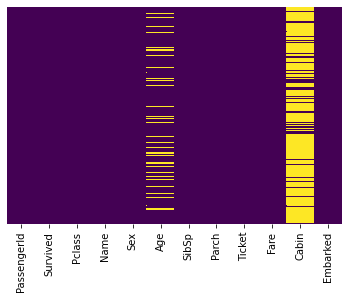

In [39]:
sns.heatmap(titanicdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

For Cabin lot of data is not available and for age about 20% of data is missing

Imputation 

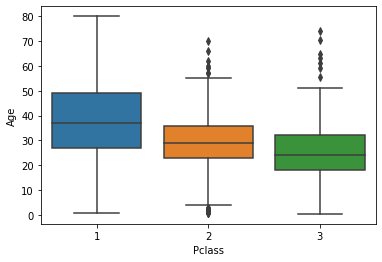

In [40]:
sns.boxplot(x='Pclass',y='Age',data=titanicdf)

In [41]:
fillist=list(titanicdf[['Pclass','Age']].groupby('Pclass').mean()['Age'])
def fillmissingAge(myobj):
    if pd.isnull(myobj[1]):
        if myobj[0]==1:
            return fillist[0]
        elif myobj[0]==2:
            return fillist[1]
        else:
            return fillist[2]
    else:
        return myobj[1]

In [56]:
titanicdf['Age_n']=titanicdf[['Pclass','Age']].apply(fillmissingAge,axis=1)

Dropping unwanted columns

In [60]:
titanicdf.drop(columns=['Age','PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [70]:
titanicdf[titanicdf['Embarked'].isnull()==True]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_n
61,1,1,female,0,0,80.0,NaN,38.0
829,1,1,female,0,0,80.0,NaN,62.0


In [73]:
titanicdf.dropna(inplace=True)

Convert categorical columns to numeric

In [79]:
male=pd.get_dummies(titanicdf['Sex'],drop_first=True)
embark=pd.get_dummies(titanicdf['Embarked'],drop_first=True)
titanicdf.drop(columns=['Sex','Embarked'],axis=1,inplace=True)

In [82]:
titanicdf=pd.concat([titanicdf,male,embark],axis=1)

Confirm all columns are cleansed and numerical

In [84]:
titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Age_n       889 non-null float64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


Build a logistic regression model on cleansed data

In [93]:
features=titanicdf[['Pclass','SibSp','Parch','Fare','Age_n','male','Q','S']]
label=titanicdf['Survived']
features_train,features_test,label_train,label_test=train_test_split(features,label,test_size=0.33,random_state=111)

In [94]:
Logmodel=LogisticRegression()
Logmodel.fit(features_train,label_train)

C:\Users\vikhyathrai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
label_predicted=Logmodel.predict(features_test)

Performance analyses of the model

In [97]:
print(metrics.classification_report(label_test,label_predicted))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       176
           1       0.84      0.72      0.78       118

    accuracy                           0.83       294
   macro avg       0.84      0.81      0.82       294
weighted avg       0.83      0.83      0.83       294



In [98]:
print(metrics.confusion_matrix(label_test,label_predicted))

[[160  16]
 [ 33  85]]
